# Vecinos más próximos

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

%load_ext autoreload
%autoreload 2

%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas, scikit-learn

Software versions
Python 3.5.3 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 5.1.0
OS Linux 4.9.16 gentoo x86_64 with debian stretch sid
numpy 1.12.1
scipy 0.19.0
matplotlib 2.0.0
pandas 0.19.2
scikit-learn 0.18.1
Sat May 06 10:20:07 2017 UTC

In [2]:
import os
import sys
sys.path.append("../src/")

from IPython.display import display
import pandas as pd
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from sklearn.externals import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.multioutput import MultiOutputClassifier
from multioutput_chained import ChainedMultiOutputClassifier
from sklearn.preprocessing import scale
import ml_plots as mp
import scoring_functions as sf
import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.3f}'.format
matplotlib.rcParams.update({'font.size': 12})

In [3]:
SCORES = [(sf.balanced, 0, 1.01), (sf.brier, -4, 0)]
IN_OPTIONS = ['IN_CR', 'IN_CS', 'IN_DS', 'is_Table', 'is_Columnar',
              'is_Int', 'is_Float', 'is_String', 'Type_Size', 'Chunk_Size',
              'Mean', 'Median', 'Sd', 'Skew', 'Kurt', 'Min', 'Max', 'Q1',
              'Q3', 'N_Streaks', 'BLZ_CRate', 'BLZ_CSpeed', 
              'BLZ_DSpeed', 'LZ4_CRate', 'LZ4_CSpeed', 'LZ4_DSpeed']
OUT_CODEC = ['Blosclz', 'Lz4', 'Lz4hc', 'Zstd']
OUT_FILTER = ['Noshuffle', 'Shuffle', 'Bitshuffle'] 
OUT_LEVELS = ['CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6', 'CL7', 'CL8', 'CL9']
OUT_BLOCKS = ['Block_8', 'Block_16', 'Block_32', 'Block_64', 'Block_128',
              'Block_256', 'Block_512', 'Block_1024', 'Block_2048']
OUT_OPTIONS = OUT_CODEC + OUT_FILTER + OUT_LEVELS + OUT_BLOCKS

In [4]:
df = pd.read_csv('../data/training_data.csv', sep='\t')
X, Y = scale(df[IN_OPTIONS].values), df[OUT_OPTIONS].values

In [5]:
clf = KNeighborsClassifier(weights='uniform')

## KNeigh - Curvas de aprendizaje

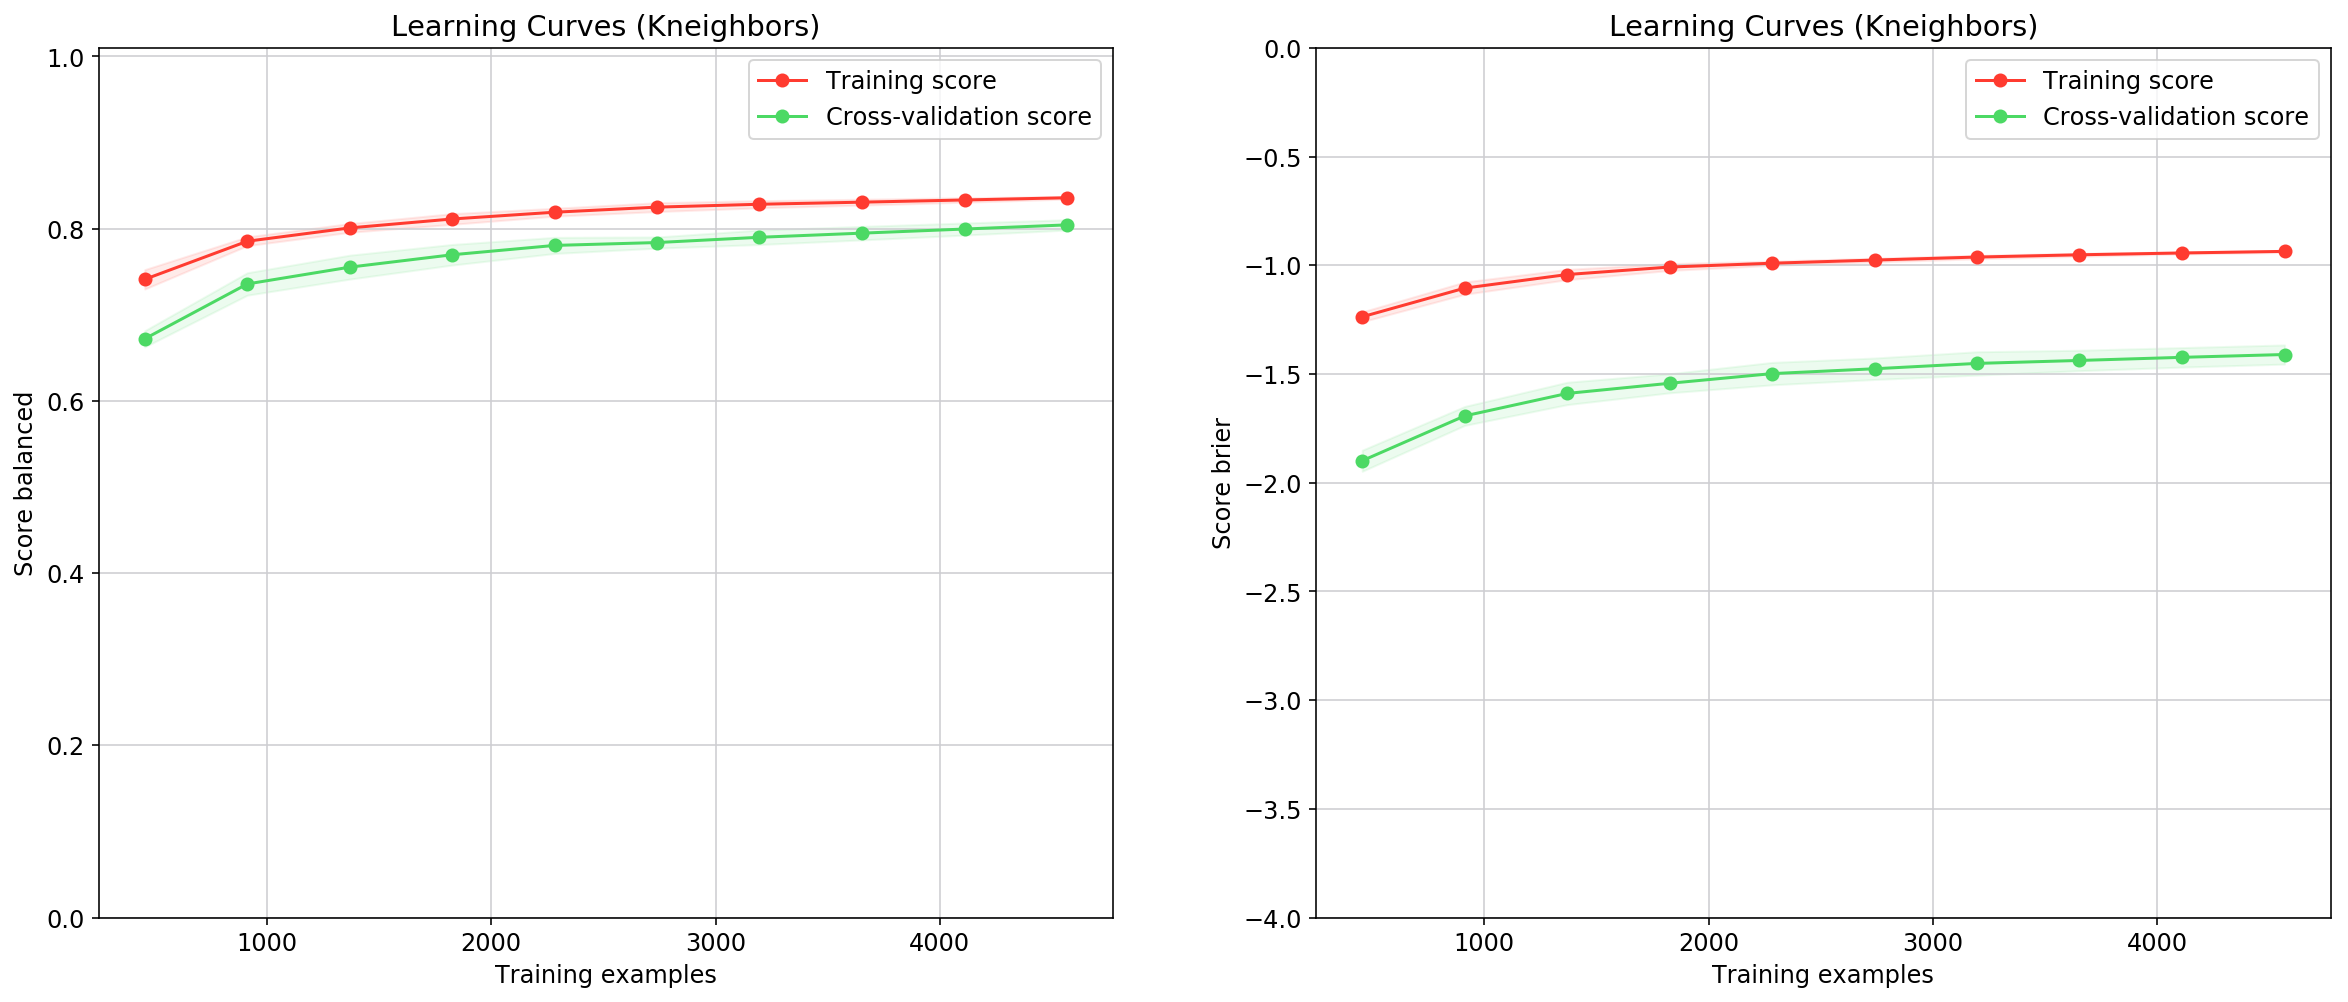

In [6]:
title = "Learning Curves (Kneighbors)"
cv = ShuffleSplit(n_splits=10, test_size=0.1)
fig = plt.figure(figsize=(20,8))
n = 121
for score in SCORES:
    mp.plot_learning_curve(
        fig.add_subplot(n), clf, title, X, Y, scoring=score[0],
        ylim=(score[1], score[2]), cv=cv, n_jobs=-1,
        train_sizes=np.linspace(.1, 1.0, 10))
    n += 1

## KNeigh - Curvas de validación

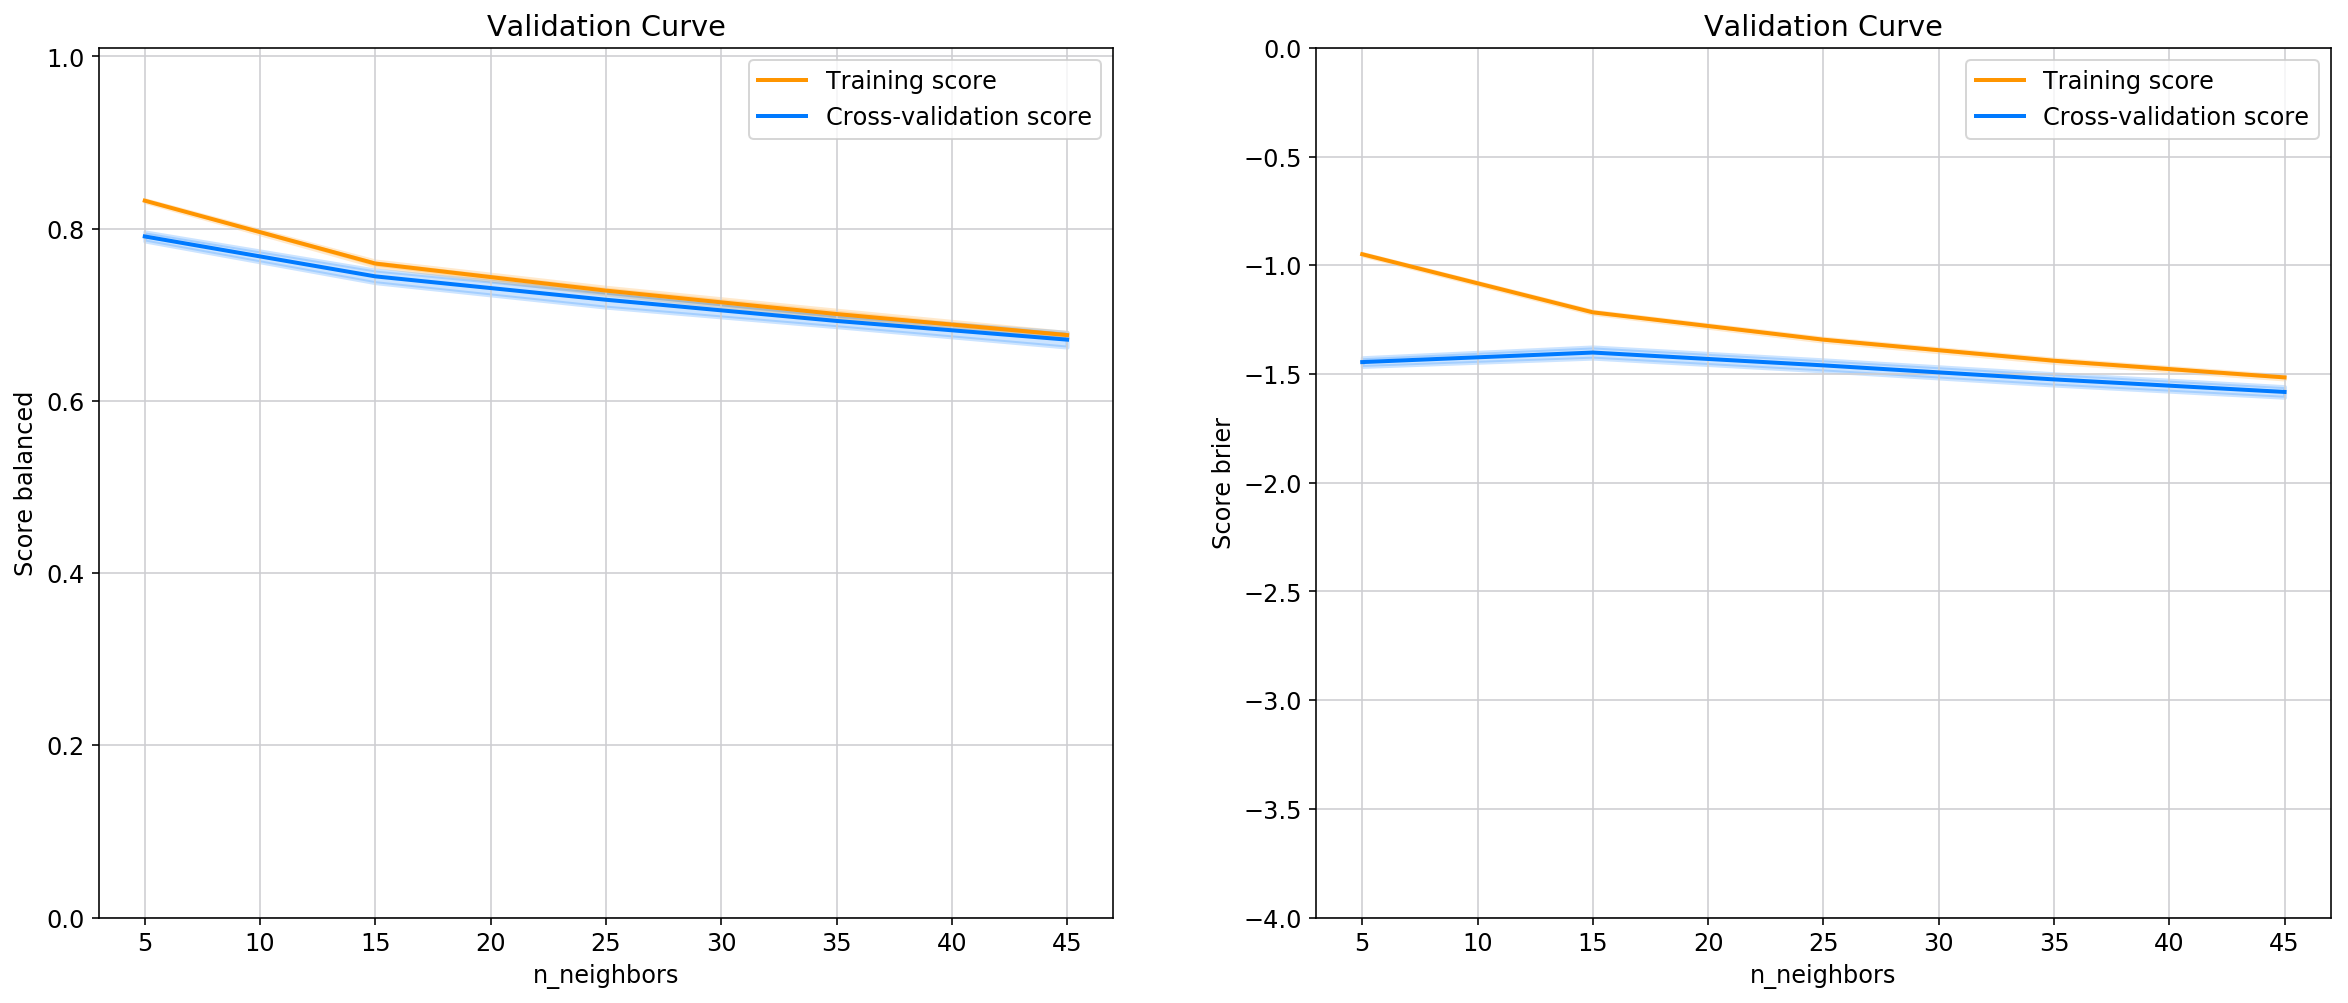

In [7]:
PARAM_NAMES = ['n_neighbors']
PARAM_RANGES = [[5, 15, 25, 35, 45]]
cv = ShuffleSplit(n_splits=10, test_size=0.25)
fig = plt.figure(figsize=(20, 8))
n = 121
for score in SCORES:
    mp.plot_validation_curve(
        fig.add_subplot(n), clf, X, Y, param_name=PARAM_NAMES[0],
        param_range=PARAM_RANGES[0], cv=cv, scoring=score[0],
        ylim=(score[1], score[2]))
    n += 1

## KNeigh - Validación cruzada de hiperparámetros

In [8]:
nested_clf = joblib.load(
    '../src/KNeinested_estimators_my_accuracy_scorer.pkl')
non_nested_clf = joblib.load(
    '../src/KNeinon_nested_estimators_my_accuracy_scorer.pkl')
mp.print_nested_winners(nested_clf, non_nested_clf)

Non Nested Winners
n_neighbors --> Counter({5: 20})
weights --> Counter({'distance': 20})
Nested Winners
n_neighbors --> Counter({5: 200})
weights --> Counter({'distance': 200})


In [9]:
nested_clf = joblib.load(
    '../src/KNeinested_estimators_my_brier_scorer.pkl')
non_nested_clf = joblib.load(
    '../src/KNeinon_nested_estimators_my_brier_scorer.pkl')
mp.print_nested_winners(nested_clf, non_nested_clf)

Non Nested Winners
n_neighbors --> Counter({15: 20})
weights --> Counter({'distance': 20})
Nested Winners
n_neighbors --> Counter({15: 200})
weights --> Counter({'distance': 200})


In [10]:
del nested_clf
del non_nested_clf

## KNeigh - Resultados

In [11]:
clf1 = KNeighborsClassifier(n_neighbors=5, weights='uniform')
mp.cross_val_report(clf1, cv, X, Y)

Name,Score
balanced,0.7930 +/-(0.0053)
brier,-1.4488 +/-(0.0268)
normal,0.2631 +/-(0.0123)
codec,0.9278 +/-(0.0072)
filter_,0.9264 +/-(0.0063)
codec_filter,0.8754 +/-(0.0081)
c_level,0.4482 +/-(0.0112) ~ 0.6937 +/-(0.0065)
block,0.4264 +/-(0.0109) ~ 0.7160 +/-(0.0044)
cl_block,0.2621 +/-(0.0074) ~ 0.7072 +/-(0.0047)


In [12]:
clf1 = KNeighborsClassifier(n_neighbors=5, weights='distance')
mp.cross_val_report(clf1, cv, X, Y)

Name,Score
balanced,0.8051 +/-(0.0047)
brier,-1.4469 +/-(0.0220)
normal,0.2766 +/-(0.0091)
codec,0.9361 +/-(0.0067)
filter_,0.9318 +/-(0.0048)
codec_filter,0.8843 +/-(0.0087)
c_level,0.4658 +/-(0.0104) ~ 0.7157 +/-(0.0087)
block,0.4355 +/-(0.0076) ~ 0.7286 +/-(0.0047)
cl_block,0.2813 +/-(0.0130) ~ 0.7221 +/-(0.0070)


In [13]:
CUSTOM3_IN = ['IN_CS', 'IN_DS', 'IN_CR', 'BLZ_CRate', 'Sd', 'BLZ_CSpeed',
              'Mean', 'Kurt', 'Skew', 'N_Streaks', 'Max', 'Min']
X = scale(df[CUSTOM3_IN].values)
clf1 = KNeighborsClassifier(n_neighbors=5, weights='distance')
mp.cross_val_report(clf1, cv, X, Y, True)

Name,Score
balanced,0.7883 +/-(0.0062)
brier,0.0000 +/-(0.0000)
normal,0.2746 +/-(0.0072)
codec,0.9299 +/-(0.0061)
filter_,0.9016 +/-(0.0083)
codec_filter,0.8486 +/-(0.0099)
c_level,0.4650 +/-(0.0070) ~ 0.7147 +/-(0.0079)
block,0.4355 +/-(0.0088) ~ 0.7366 +/-(0.0069)
cl_block,0.2944 +/-(0.0082) ~ 0.7265 +/-(0.0058)


In [14]:
CUSTOM2_IN = ['IN_CS', 'IN_DS', 'IN_CR', 'BLZ_CRate', 'Sd', 'BLZ_CSpeed',
              'Mean', 'Kurt', 'Skew', 'Max', 'Min']
X = scale(df[CUSTOM2_IN].values)
clf1 = KNeighborsClassifier(n_neighbors=5, weights='distance')
mp.cross_val_report(clf1, cv, X, Y, True)

Name,Score
balanced,0.7559 +/-(0.0095)
brier,0.0000 +/-(0.0000)
normal,0.2416 +/-(0.0057)
codec,0.9124 +/-(0.0071)
filter_,0.8548 +/-(0.0113)
codec_filter,0.7964 +/-(0.0083)
c_level,0.4396 +/-(0.0084) ~ 0.6984 +/-(0.0099)
block,0.4021 +/-(0.0115) ~ 0.7172 +/-(0.0061)
cl_block,0.2504 +/-(0.0120) ~ 0.7114 +/-(0.0057)


In [15]:
CUSTOM_IN = ['IN_CS', 'IN_DS', 'IN_CR', 'BLZ_CRate', 'BLZ_CSpeed']
X = scale(df[CUSTOM_IN].values)
clf1 = KNeighborsClassifier(n_neighbors=5, weights='distance')
mp.cross_val_report(clf1, cv, X, Y, True)

Name,Score
balanced,0.7130 +/-(0.0084)
brier,0.0000 +/-(0.0000)
normal,0.2284 +/-(0.0105)
codec,0.9041 +/-(0.0095)
filter_,0.7874 +/-(0.0139)
codec_filter,0.7338 +/-(0.0105)
c_level,0.4225 +/-(0.0102) ~ 0.6900 +/-(0.0064)
block,0.3741 +/-(0.0073) ~ 0.7093 +/-(0.0074)
cl_block,0.2491 +/-(0.0111) ~ 0.6961 +/-(0.0077)


In [16]:
CUSTOM_IN = ['IN_CS', 'IN_DS', 'IN_CR', 'Mean', 'Max', 'Min']
X = scale(df[CUSTOM_IN].values)
clf1 = KNeighborsClassifier(n_neighbors=5, weights='distance')
mp.cross_val_report(clf1, cv, X, Y, True)

Name,Score
balanced,0.6961 +/-(0.0080)
brier,0.0000 +/-(0.0000)
normal,0.1877 +/-(0.0120)
codec,0.8461 +/-(0.0089)
filter_,0.8556 +/-(0.0090)
codec_filter,0.7460 +/-(0.0077)
c_level,0.3667 +/-(0.0151) ~ 0.6509 +/-(0.0097)
block,0.3392 +/-(0.0097) ~ 0.6644 +/-(0.0164)
cl_block,0.1909 +/-(0.0129) ~ 0.6573 +/-(0.0134)


In [17]:
CUSTOM_IN = ['IN_CS', 'IN_DS', 'IN_CR']
X = scale(df[CUSTOM_IN].values)
clf1 = KNeighborsClassifier(n_neighbors=5, weights='distance')
mp.cross_val_report(clf1, cv, X, Y, True)

Name,Score
balanced,0.4339 +/-(0.0245)
brier,0.0000 +/-(0.0000)
normal,0.0434 +/-(0.0207)
codec,0.6855 +/-(0.0699)
filter_,0.4243 +/-(0.0474)
codec_filter,0.3110 +/-(0.0430)
c_level,0.1856 +/-(0.0513) ~ 0.5962 +/-(0.0413)
block,0.1601 +/-(0.0277) ~ 0.5657 +/-(0.0439)
cl_block,0.0789 +/-(0.0426) ~ 0.5704 +/-(0.0375)


In [18]:
CUSTOM3_IN = ['IN_CS', 'IN_DS', 'IN_CR', 'BLZ_CRate', 'Sd', 'BLZ_CSpeed',
              'Mean', 'Kurt', 'Skew', 'N_Streaks', 'Max', 'Min']
X = scale(df[CUSTOM3_IN].values)
clf1 = ChainedMultiOutputClassifier(
    KNeighborsClassifier(n_neighbors=5, weights='distance'))
mp.cross_val_report(clf1, cv, X, Y, True)

Name,Score
balanced,0.8205 +/-(0.0058)
brier,0.0000 +/-(0.0000)
normal,0.3146 +/-(0.0088)
codec,0.9298 +/-(0.0082)
filter_,0.9036 +/-(0.0095)
codec_filter,0.8549 +/-(0.0117)
c_level,0.5189 +/-(0.0079) ~ 0.7723 +/-(0.0103)
block,0.4898 +/-(0.0136) ~ 0.8039 +/-(0.0050)
cl_block,0.3318 +/-(0.0121) ~ 0.7887 +/-(0.0070)
